In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load and preprocess data
file_path = 'dataset/normalised_data.csv'
data_fillmean = pd.read_csv(file_path)

# Assuming outlier removal and normalization are completed
# Let's consider these features: 'sqft_living', 'bathrooms', 'bedrooms', 'floors'
features_to_cluster = ['sqft_living', 'bathrooms', 'bedrooms', 'floors']

import warnings
warnings.filterwarnings('ignore')


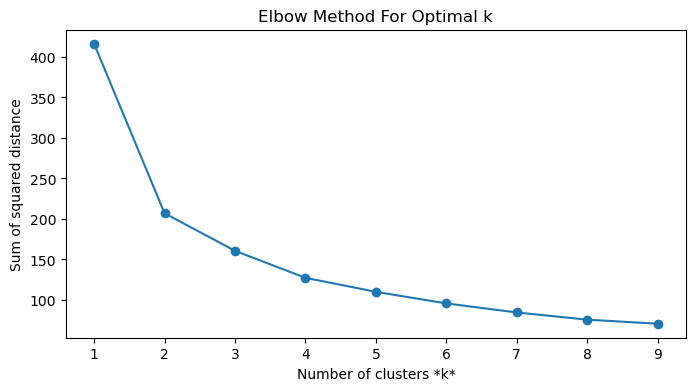

Cluster
1    1713
0    1478
2    1064
Name: count, dtype: int64
[[0.17197279 0.12219959 0.21384929 0.03991853]
 [0.36685723 0.36670561 0.32023949 0.43107477]
 [0.34341631 0.30686916 0.35829439 0.03757009]]


In [4]:
sse = []
list_k = list(range(1, 10))
for k in list_k:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(data_fillmean[features_to_cluster])
    sse.append(km.inertia_)

# Plot SSE for each k
plt.figure(figsize=(8, 4))
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.title('Elbow Method For Optimal k')
plt.show()

# Assuming the elbow is observed at k=3 (adjust based on your plot)
kmeans = KMeans(n_clusters=3, random_state=42)
data_fillmean['Cluster'] = kmeans.fit_predict(data_fillmean[features_to_cluster])

# Now let's see the centroids and cluster assignments
print(data_fillmean['Cluster'].value_counts())
print(kmeans.cluster_centers_)

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Include cluster labels as a feature
features = ['sqft_living', 'bathrooms', 'bedrooms', 'floors', 'Cluster']
X = data_fillmean[features]
y = data_fillmean['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

import numpy as np


rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')
# Optionally, compare it to average or median house prices for context
average_price = data_fillmean['price'].mean()
median_price = data_fillmean['price'].median()
print(f'Average Price: {average_price}')
print(f'Median Price: {median_price}')


Mean Squared Error: 25180569050.915585
Root Mean Squared Error: 158683.86512470504
Average Price: 479295.05384491774
Median Price: 446000.0


The RMSE of about 158,683.87, while it might seem large at first, is actually about 33% of the average price and about 36% of the median price. In the context of house pricing, where the price range can be very wide and affected by numerous variables, this is a decent starting point. It indicates that on average, the model's predictions are off by approximately 158,683.87 for each prediction.

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

# Split data into larger training and smaller testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42) 

# Fit a regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

# Optionally, check the change in average or median house prices for context
print(f"Average Price: {data_fillmean['price'].mean()}")
print(f"Median Price: {data_fillmean['price'].median()}")

# Calculate R2 Score
r2 = r2_score(y_test, y_pred)
# Print R2 Score
print(f"R2 Score: {r2}")

Mean Squared Error: 25867534719.06307
Root Mean Squared Error: 160833.87304626804
Average Price: 479295.05384491774
Median Price: 446000.0
R2 Score: 0.37629862015002824


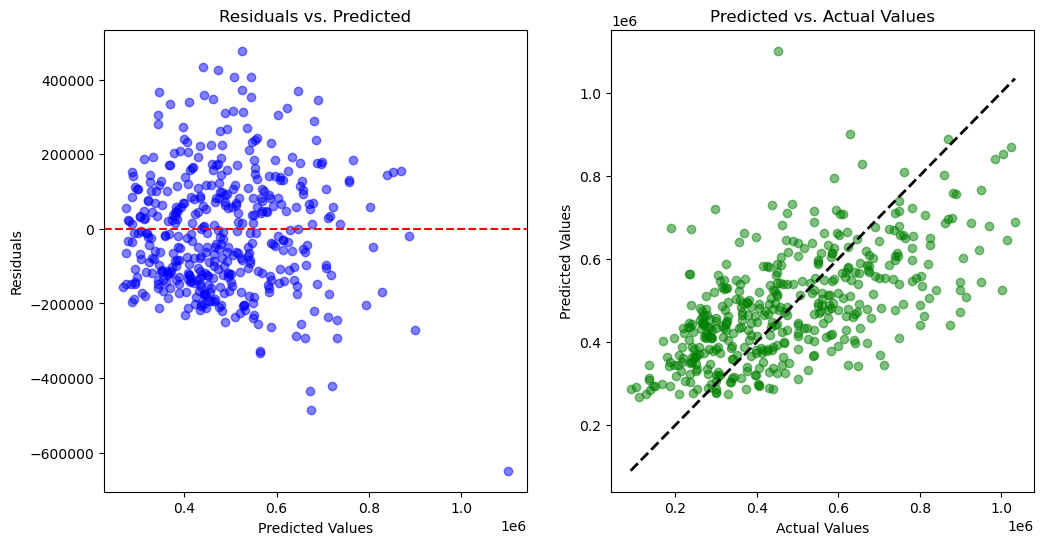

In [19]:
# Predict values
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Plotting residuals
plt.figure(figsize=(12, 6))

# Subplot 1: Residuals Plot
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted')

# Subplot 2: Predicted vs Actual Values
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Ideal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')

plt.show()